# Finding the optimal speed for the least energy use

In [82]:
%reset

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

sp.init_printing(use_unicode=True)
sp.init_session()

dist = 30000

A = Symbol('A', positive=True)
k = Symbol('k', positive=True)
Cd = Symbol('Cd', positive=True)
rho = Symbol('rho', positive=True)
alpha = Symbol('alpha', positive=True)
v_w = Symbol('v_w', positive=True)
v_l = Symbol('v_l', positive=True, real=True)
v_r = Symbol('v_r', positive=True)
t = Symbol('t', positive=True)
s = Symbol('s', positive=True)
beta = Symbol('beta', positive=True)
E_tot = Symbol('E_tot', positive=True)

beta = sp.Symbol('beta')

#beta = sp.atan(v_w*sp.sin(alpha)/(v_f - v_w*sp.cos(alpha)))

#Pw = rho*A*Cd/2.0*sp.cos(beta)*(v_f**2 + v_w**2 + 2*v_f*v_w*sp.cos(alpha))*v_f

#dPw = sp.diff(Pw, v_f)
#
#print(dPw)
#dPw = sp.simplify(dPw)
#print(pretty(dPw))

#res = sp.solve(sp.diff(Pw, v_f), v_f)

#print(res)

#sp.plot(res[0].subs(v_w,1), (alpha, -np.pi, sp.pi))

#alpha_lam = sp.lambdify(alpha, res[0].subs(v_w,1), modules=['numpy'])

#alpha = np.linspace(-np.pi, np.pi, 1000)
#Pw_opt = alpha_lam(alpha)

#plt.plot(alpha, Pw_opt)
#plt.show()


Once deleted, variables cannot be recovered. Proceed (y/[n])? y
IPython console for SymPy 1.0 (Python 3.5.2-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


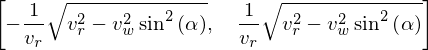

In [83]:


trig_eq = Eq(sp.sin(alpha)/v_r, sp.sin(sp.pi - beta)/v_w)
sols = solve(trig_eq, beta)

scal_prods = []
for x in sols:
    scal_prods.append((sp.cos(x)).simplify())
    
scal_prods


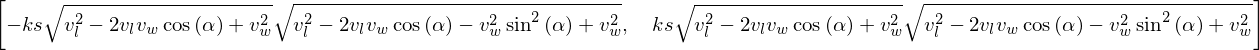

In [84]:
integrand_E = []
E_tot = []
for x in scal_prods:
    res = (k*v_r**2*x)
    res = res.subs(v_r, sp.sqrt(v_w**2 + v_l**2 - 2*v_w*v_l*sp.cos(alpha)))
    integrand_E.append(res)
    E_tot.append(sp.integrate(res, s))
E_tot

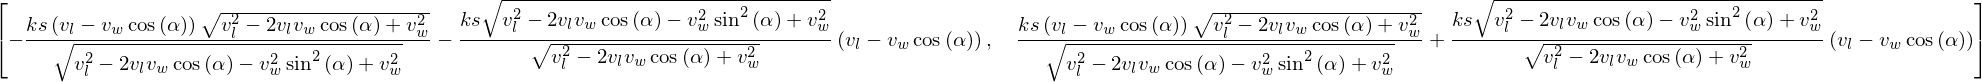

In [85]:
E_tot_d = []
for x in E_tot:
    E_tot_d.append(diff(x, v_l))
E_tot_d

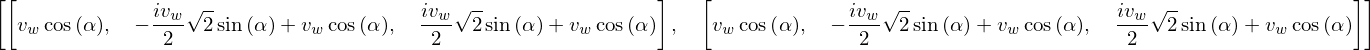

In [86]:
sols = []
for x in E_tot_d:
    sols.append(solve(x, v_l))
    
sols

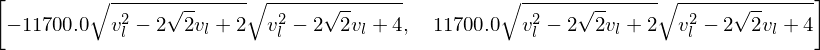

In [87]:
E_tots = []
for x in E_tot:
    E_tot_s = x.subs(v_w, 2)
    E_tot_s = E_tot_s.subs(alpha, sp.pi/4)
    E_tot_s = E_tot_s.subs(k, 0.6*1.3/2)
    E_tot_s = E_tot_s.subs(s, dist)
    E_tots.append(E_tot_s)

E_tots

In [88]:

v_l_lam = sp.lambdify(v_l, E_tots[1], modules=['numpy'])

v_ll = np.linspace(1, 20, 10000)

E_tott = v_l_lam(v_ll)

plt.plot(v_ll, E_tott/3600000)
plt.plot(v_ll, dist/v_ll*1/3600)
plt.show()










#solve(E_tot_d, v_l)